# Quick `pandas` Tutorial

In [231]:
import pandas as pd

The data can set from different sources. By default, `pandas` accepts dictionary as data set. 

In [232]:
data = {
    'Plant': [f'Plant {chr(65+i)}' for i in range(20)],
    'Power_Generation_MW': [500, 300, 800, 400, 600, 700, 200, 1000, 500, 600, 700, 800, 200, 400, 300, 900, 900, 200, 500, 600],
    'Efficiency_%': [40, 35, 50, 45, 42, 38, 30, 55, 48, 44, 39, 41, 37, 46, 34, 52, 53, 32, 49, 43],
    'Operating_Hours': [4000, 3500, 4500, 3000, 3800, 4200, 3200, 5000, 3900, 3700, 4100, 4800, 3300, 3600, 3400, 4900, 4700, 3100, 4400, 4300]
}

If the data is a python `dict`, then you can create a `pandas.DataFrame` like this:

In [233]:
df = pd.DataFrame(data)
df

,Plant,Power_Generation_MW,Efficiency_%,Operating_Hours
0,Plant A,500,40,4000
1,Plant B,300,35,3500
2,Plant C,800,50,4500
3,Plant D,400,45,3000
4,Plant E,600,42,3800
5,Plant F,700,38,4200
6,Plant G,200,30,3200
7,Plant H,1000,55,5000
8,Plant I,500,48,3900
9,Plant J,600,44,3700


In [234]:
df.head(5)

,Plant,Power_Generation_MW,Efficiency_%,Operating_Hours
0,Plant A,500,40,4000
1,Plant B,300,35,3500
2,Plant C,800,50,4500
3,Plant D,400,45,3000
4,Plant E,600,42,3800


In [235]:
df.tail(3)

,Plant,Power_Generation_MW,Efficiency_%,Operating_Hours
17,Plant R,200,32,3100
18,Plant S,500,49,4400
19,Plant T,600,43,4300


Get information about the DataFram

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Plant                20 non-null     object
 1   Power_Generation_MW  20 non-null     int64 
 2   Efficiency_%         20 non-null     int64 
 3   Operating_Hours      20 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 772.0+ bytes


Get summary statistics

In [237]:
df.describe()

,Power_Generation_MW,Efficiency_%,Operating_Hours
count,20.000000,20.000000,20.000000
mean,555.000000,42.650000,3970.000000
std,248.098028,7.154498,620.780493
min,200.000000,30.000000,3000.000000
25%,375.000000,37.750000,3475.000000
50%,550.000000,42.500000,3950.000000
75%,725.000000,48.250000,4425.000000
max,1000.000000,55.000000,5000.000000


Adding New Calculated Columns

In [238]:
df['Annual_Energy_GWh'] = df['Power_Generation_MW'] * df['Operating_Hours'] / 1000
df

,Plant,Power_Generation_MW,Efficiency_%,Operating_Hours,Annual_Energy_GWh
0,Plant A,500,40,4000,2000.0
1,Plant B,300,35,3500,1050.0
2,Plant C,800,50,4500,3600.0
3,Plant D,400,45,3000,1200.0
4,Plant E,600,42,3800,2280.0
5,Plant F,700,38,4200,2940.0
6,Plant G,200,30,3200,640.0
7,Plant H,1000,55,5000,5000.0
8,Plant I,500,48,3900,1950.0
9,Plant J,600,44,3700,2220.0


Filtering and Querying Data

In [239]:
high_efficiency_plants = df[df['Efficiency_%'] > 40]
high_efficiency_plants

,Plant,Power_Generation_MW,Efficiency_%,Operating_Hours,Annual_Energy_GWh
2,Plant C,800,50,4500,3600.0
3,Plant D,400,45,3000,1200.0
4,Plant E,600,42,3800,2280.0
7,Plant H,1000,55,5000,5000.0
8,Plant I,500,48,3900,1950.0
9,Plant J,600,44,3700,2220.0
11,Plant L,800,41,4800,3840.0
13,Plant N,400,46,3600,1440.0
15,Plant P,900,52,4900,4410.0
16,Plant Q,900,53,4700,4230.0


Group plants by efficiency and calculate the average power generation

In [240]:
avg_generation_by_efficiency = df.groupby('Power_Generation_MW')['Efficiency_%'].mean()
avg_generation_by_efficiency

Power_Generation_MW
200     33.000000
300     34.500000
400     45.500000
500     45.666667
600     43.000000
700     38.500000
800     45.500000
900     52.500000
1000    55.000000
Name: Efficiency_%, dtype: float64

Visualization: Efficiency vs Power Generation

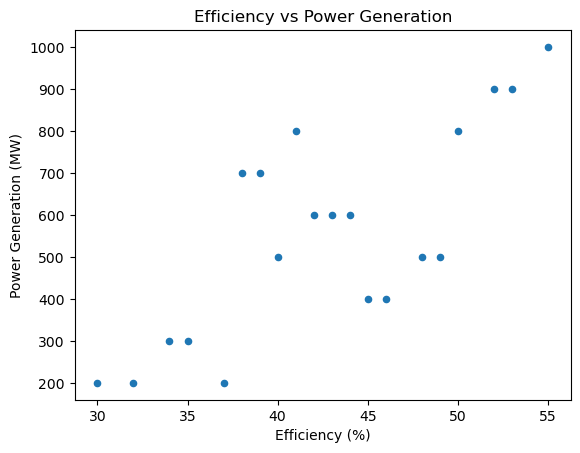

In [241]:
import matplotlib.pyplot as plt

df.plot(x='Efficiency_%', y='Power_Generation_MW', kind='scatter', title='Efficiency vs Power Generation')
plt.xlabel('Efficiency (%)')
plt.ylabel('Power Generation (MW)')
plt.show()

Load data from a CSV file

In [ ]:
df = pd.read_csv('ebsilon/my_data.csv')

Save the data to a new JSON file

In [ ]:
df.to_json('tespy/my_modified_data.json', orient='records', indent=4)